In [1]:
from typing import Tuple
from constants import SHEET_URL
import pandas as pd
from datetime import timedelta, date, datetime

In [2]:
SUPPLEMENT = 'Omega 3 (Other)'

In [3]:
def read_supplement_log():
    schema = {
        'supplement': str,
        'value_mg': float,
        'value_mcg': float,
        'date': str,
    }
    df = pd.read_csv(SHEET_URL, dtype=schema)
    df['date'] = df['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())
    df['value_mg_filled'] = df['value_mg'].combine_first(df['value_mcg'] / 1000)
    return df


def generate_date_index(start_date: date, end_date: date = date.today()):
    if start_date > end_date:
        return []
    num_days = (end_date - start_date).days
    return [start_date + timedelta(days=d) for d in range(num_days+1)]


def get_min_max_date(df: pd.DataFrame, supplement: str) -> Tuple[date, date]:
    date_df = df[df['supplement'] == supplement]['date']
    return (date_df.min(), date_df.max())


def create_timeseries_df(df: pd.DataFrame, timeseries: list[date], supplement: str):
    supplement_df = df[df['supplement'] == supplement]
    dates_df = pd.DataFrame({'date': time_range})
    return dates_df.merge(supplement_df, on='date', how='left').ffill()


def check_data_availability(df: pd.DataFrame, supplement: str):
    if supplement not in df.supplement.tolist():
        raise ValueError(f"No data available for '{SUPPLEMENT}'")

In [4]:
df = read_supplement_log()
check_data_availability(df, SUPPLEMENT)
min_val, max_val = get_min_max_date(df, SUPPLEMENT)
time_range = generate_date_index(min_val, date.today())
timeseries_df = create_timeseries_df(df, time_range, SUPPLEMENT)

<Axes: title={'center': 'Omega 3 (Other)'}, xlabel='date'>

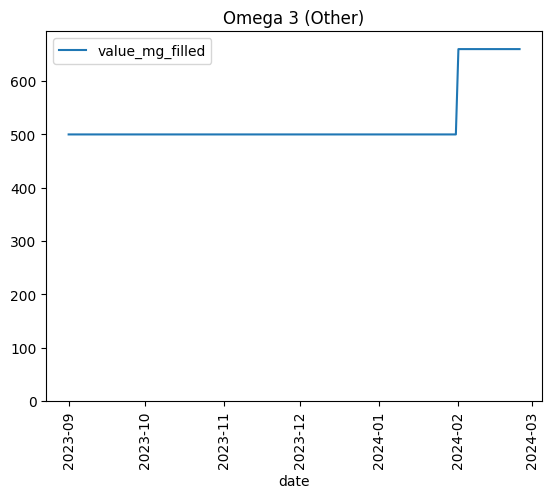

In [5]:
timeseries_df[['date', 'value_mg_filled']].plot(
    x='date', 
    y='value_mg_filled', 
    rot=90, 
    title=SUPPLEMENT,
    ylim=(0, timeseries_df.value_mg_filled.max() * 1.05)
)